In [1]:
pwd

'/home/bijanadmin/Desktop/DL-modulators'

In [10]:
%matplotlib inline
import numpy as np
import torch
from torch import nn, optim
from torchvision import transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os

### Load all the HIT trials in a given Session (all electrodes)

In [2]:
# PATH DIRECTORY 
Sess = 15
Ch = 1

################
# CHANNEL 1 ###
###############

# name directory
pathHit = 'Data/Hits/1_Subject/{}_Sess/{}_Ch/1_Subject_{}_Sess_{}_Ch'.format(Sess,Ch,Sess,Ch)
# print(pathHit)
# name files
fnHit = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_{}_hit.txt".format(Ch,1)) # name file hit (first one)
fnHitLabels = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_Hits_index.txt".format(Ch)) # name file with labels index

# load hit matrix and label vector
tensor_hit = np.loadtxt(fnHit,dtype='f',delimiter='\t') # load hit matrix
labelsHit = np.loadtxt(fnHitLabels,dtype='l',delimiter='\t') # load labels vector

#     #plt.imshow(np.flipud(tensor_hit.transpose()))
# for all other indexes
for indx in range(2,len(labelsHit)+1):
    fnHit = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_{}_hit.txt".format(Ch,indx)) # name file hit (following one)
    newmat_hit = np.loadtxt(fnHit,dtype='f',delimiter='\t') # load hit matrix
    tensor_hit = np.dstack((tensor_hit,newmat_hit)) # stack matrix along the 3rd dimension 
        
####################
# ALL OTHER CHANNELS
# ####################

for Ch in range(2,53):
    
    print('Channel: ',Ch)
    # name directory
    pathHit = 'Data/Hits/1_Subject/{}_Sess/{}_Ch/1_Subject_{}_Sess_{}_Ch'.format(Sess,Ch,Sess,Ch)
#     print(pathHit)

    # name file
    fnHit = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_{}_hit.txt".format(Ch,1)) # name file hit (first one)
    fnHitLabels = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_Hits_index.txt".format(Ch)) # name file hit (first one)

    labels_Hit = np.loadtxt(fnHitLabels,dtype='l',delimiter='\t') # load hit matrix

#     #plt.imshow(np.flipud(tensor_hit.transpose()))
    for indx in range(2,len(labels_Hit)+1):
        fnHit = os.path.join(pathHit,"1_Subject_15_Sess_{}_Ch_{}_hit.txt".format(Ch,indx)) # name file hit (following one)
        newmat_hit = np.loadtxt(fnHit,dtype='f',delimiter='\t') # load hit matrix
        tensor_hit = np.dstack((tensor_hit,newmat_hit)) # stack matrix along the 3rd dimension 

    print(tensor_hit.shape) 

Channel:  2
(100, 61, 127)
Channel:  3
(100, 61, 191)
Channel:  4
(100, 61, 256)
Channel:  5
(100, 61, 321)
Channel:  6
(100, 61, 386)
Channel:  7
(100, 61, 451)
Channel:  8
(100, 61, 516)
Channel:  9
(100, 61, 581)
Channel:  10
(100, 61, 645)
Channel:  11
(100, 61, 709)
Channel:  12
(100, 61, 774)
Channel:  13
(100, 61, 838)
Channel:  14
(100, 61, 902)
Channel:  15
(100, 61, 966)
Channel:  16
(100, 61, 1030)
Channel:  17
(100, 61, 1093)
Channel:  18
(100, 61, 1158)
Channel:  19
(100, 61, 1223)
Channel:  20
(100, 61, 1288)
Channel:  21
(100, 61, 1353)
Channel:  22
(100, 61, 1418)
Channel:  23
(100, 61, 1483)
Channel:  24
(100, 61, 1547)
Channel:  25
(100, 61, 1612)
Channel:  26
(100, 61, 1677)
Channel:  27
(100, 61, 1741)
Channel:  28
(100, 61, 1806)
Channel:  29
(100, 61, 1871)
Channel:  30
(100, 61, 1934)
Channel:  31
(100, 61, 1998)
Channel:  32
(100, 61, 2063)
Channel:  33
(100, 61, 2124)
Channel:  34
(100, 61, 2189)
Channel:  35
(100, 61, 2254)
Channel:  36
(100, 61, 2318)
Channel

In [3]:
tensor_hit.shape

(100, 61, 3345)

### Load all the MISS trials in a given Session (all electrodes)

In [4]:
# PATH DIRECTORIES 
Sess = 15
Ch = 1

################
# CHANNEL 1 ###
###############

# name directory
pathMiss = 'Data/Misses/1_Subject/{}_Sess/{}_Ch/1_Subject_{}_Sess_{}_Ch'.format(Sess,Ch,Sess,Ch)
# print(pathMiss)


# name files
fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_{}_miss.txt".format(Ch,1)) # name file miss (first one)
fnMissLabels = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_Misses_index.txt".format(Ch)) # name file with labels index

# load miss matrix and label vector
tensor_miss = np.loadtxt(fnMiss,dtype='f',delimiter='\t') # load miss matrix
labels_Miss = np.loadtxt(fnMissLabels,dtype='l',delimiter='\t') # load labels vector

#     #plt.imshow(np.flipud(tensor_miss.transpose()))
# for all other indexes
for indx in range(2,len(labels_Miss)+1):
    fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_{}_miss.txt".format(Ch,indx)) # name file miss (following one)
    newmat_miss = np.loadtxt(fnMiss,dtype='f',delimiter='\t') # load miss matrix
    tensor_miss = np.dstack((tensor_miss,newmat_miss)) # stack matrix along the 3rd dimension 
        
####################
# ALL OTHER CHANNELS
# ####################

for Ch in range(2,53):
    
    print('Channel: ',Ch)
    # name directory
    pathMiss = 'Data/Misses/1_Subject/{}_Sess/{}_Ch/1_Subject_{}_Sess_{}_Ch'.format(Sess,Ch,Sess,Ch)
#     print(pathMiss)
#     pathMiss = 'Data/Misses/1_Subject/{}_Sess/{}_Ch/1_Subject_{}_Sess_{}_Ch'.format(Sess,Ch,Sess,Ch)
#     print(pathMiss)

    # name files
    fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_{}_miss.txt".format(Ch,1)) # name file miss (first one)
    fnMissLabels = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_Misses_index.txt".format(Ch)) # name file with labels index

    labels_Miss = np.loadtxt(fnMissLabels,dtype='l',delimiter='\t') # load labels vector

#     #plt.imshow(np.flipud(tensor_miss.transpose()))
    for indx in range(2,len(labels_Miss)+1):
        fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_{}_Ch_{}_miss.txt".format(Ch,indx)) # name file miss (following one)
        newmat_miss = np.loadtxt(fnMiss,dtype='f',delimiter='\t') # load miss matrix
        tensor_miss = np.dstack((tensor_miss,newmat_miss)) # stack matrix along the 3rd dimension 

    print(tensor_miss.shape) 

Channel:  2
(100, 61, 87)
Channel:  3
(100, 61, 130)
Channel:  4
(100, 61, 173)
Channel:  5
(100, 61, 216)
Channel:  6
(100, 61, 259)
Channel:  7
(100, 61, 302)
Channel:  8
(100, 61, 345)
Channel:  9
(100, 61, 388)
Channel:  10
(100, 61, 431)
Channel:  11
(100, 61, 474)
Channel:  12
(100, 61, 517)
Channel:  13
(100, 61, 559)
Channel:  14
(100, 61, 601)
Channel:  15
(100, 61, 643)
Channel:  16
(100, 61, 686)
Channel:  17
(100, 61, 729)
Channel:  18
(100, 61, 772)
Channel:  19
(100, 61, 815)
Channel:  20
(100, 61, 858)
Channel:  21
(100, 61, 901)
Channel:  22
(100, 61, 944)
Channel:  23
(100, 61, 987)
Channel:  24
(100, 61, 1030)
Channel:  25
(100, 61, 1071)
Channel:  26
(100, 61, 1114)
Channel:  27
(100, 61, 1157)
Channel:  28
(100, 61, 1200)
Channel:  29
(100, 61, 1243)
Channel:  30
(100, 61, 1286)
Channel:  31
(100, 61, 1329)
Channel:  32
(100, 61, 1370)
Channel:  33
(100, 61, 1409)
Channel:  34
(100, 61, 1451)
Channel:  35
(100, 61, 1493)
Channel:  36
(100, 61, 1535)
Channel:  37
(10

In [5]:
print(tensor_hit.shape)
print(tensor_miss.shape)

(100, 61, 3345)
(100, 61, 2212)


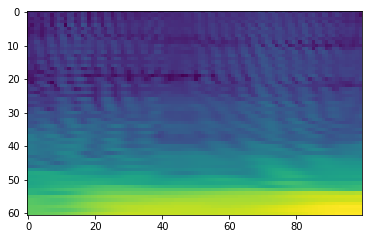

In [6]:
plt.imshow(np.flipud(tensor_hit[:,:,1].transpose()))

### Generate the labels

Generate the labels for hits and misses and stack them into a single array

In [7]:
labels_hit = np.ones(tensor_hit.shape[2],dtype='l')
labels_miss = np.zeros(tensor_miss.shape[2],dtype='l')
labels_tot = np.concatenate((labels_hit,labels_miss),axis=None)
# print(labels_tot)
print(labels_tot.shape)

(5557,)


### Merge all the hits and misses matrices together

In [8]:
tensor_trial = np.dstack((tensor_hit,tensor_miss))
print(tensor_trial.shape)
tensor_trial[:,:,1].shape
tensor_trial.shape[2]

(100, 61, 5557)


5557

### Normalize inputs

In [9]:
for indx in range(tensor_trial.shape[2]):
    mean = np.mean(tensor_trial[:,:,indx])
    std = np.std(tensor_trial[:,:,indx])
    tensor_trial[:,:,indx] = (tensor_trial[:,:,indx] - mean)/std

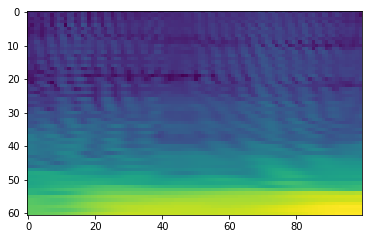

In [10]:
plt.imshow(np.flipud(tensor_trial[:,:,1].transpose()))

## Load data into a trainloader and testloader

In [13]:
TOT_data = []
for i in range(len(labels_tot)):
    TOT_data.append([tensor_trial[:,:,i], labels_tot[i]])

# set length train and test set
train_length = int(0.75*len(TOT_data))
test_length = len(TOT_data) - train_length

# split data set 
train_dataset, test_dataset = torch.utils.data.random_split(TOT_data,(train_length,test_length))

trainloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=10)
testloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=10)

In [15]:
train_dataset

#### Create iterable 

torch.Size([10])
<built-in method type of Tensor object at 0x7fa0b4e12af8>
tensor(0)


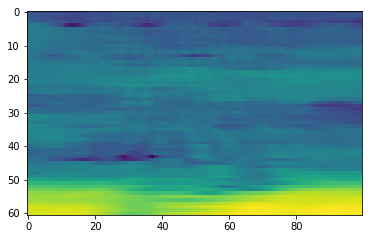

In [20]:
images, labels = next(iter(testloader))
plt.imshow(np.flipud(images[0].numpy().transpose()))
print(labels.shape)
print(images.type)
print(labels[0])

In [21]:
images.view(images.shape[0],-1).shape

torch.Size([10, 6100])

### Define the Network: Multilayer perceptron 
Use some dropout

In [6]:
class FFN(nn.Module):
    def __init__(self):
        super().__init__()
        
        # linear layers
        self.fc1 = nn.Linear(6100,762)
        self.fc2 = nn.Linear(762, 381)
        self.fc3 = nn.Linear(381,2)
#         self.fc5 = nn.Linear(381,2)
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)    
    
    def forward(self,x):
        
        # flatten the input tensor 
        x = x.view(x.shape[0],-1)
        
        # activation functions
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
#         x = self.dropout(F.relu(self.fc3(x)))
#         x = F.relu(self.fc4(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        
        return x

In [7]:
model = FFN()
model

FFN(
  (fc1): Linear(in_features=6100, out_features=762, bias=True)
  (fc2): Linear(in_features=762, out_features=381, bias=True)
  (fc3): Linear(in_features=381, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

### Set loss function and optimizer

In [8]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

#### Move model on GPU if available 

In [9]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()
next(model.parameters()).is_cuda
next(model.parameters()).is_cuda
train_on_gpu

CUDA is available!  Training on GPU ...


True

In [32]:
labels

tensor([1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

## Train and validate the Network 

In [33]:
#######################
#     TRAINING  
######################

model.train() # set the network in training mode

epochs = 20
train_losses, test_losses = [], []

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
#         if train_on_gpu: # move data on GPU
#             images, labels = images.cuda(), labels.cuda()
            
        # flatten images into a vector
#         labels = labels.long() # change label type from int to long 
        
        # Clear the gradients
        optimizer.zero_grad()
        
        log_ps = model(images) # forward pass
        loss = criterion(log_ps,labels) # compute the loss
        loss.backward() # backpropagate to compute the gradients
        optimizer.step() # update the weights
        
        running_loss =+ loss.item()
    
    else:
        
        #######################
        #     VALIDATION 
        ######################
 
        test_loss = 0
        accuracy = 0
        with torch.no_grad(): # set the tracing of gradients to zero
            model.eval() # set the dropout to OFF, i.e. model is in evaluation mode
            
            for images, labels in testloader:
                
#                 if train_on_gpu: # move data on GPU
#                     images, labels = images.cuda(), labels.cuda()
                
                 # flatten images into a vector
#                 labels = labels.long() # change label type from int to long 
        
                log_ps = model(images)
                test_loss += criterion(log_ps,labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)                
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor)) 
                
        model.train() # set the model back to train mode, i.e. dropout is ON
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
            
            
        ############################
        # PRINT ACCURACTY AND LOSSES
        ############################
        
        print("Epoch: {}/{}.. ".format(epoch+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/20..  Training Loss: 0.003..  Test Loss: 0.671..  Test Accuracy: 0.604
Epoch: 2/20..  Training Loss: 0.002..  Test Loss: 0.672..  Test Accuracy: 0.604
Epoch: 3/20..  Training Loss: 0.002..  Test Loss: 0.671..  Test Accuracy: 0.604
Epoch: 4/20..  Training Loss: 0.002..  Test Loss: 0.671..  Test Accuracy: 0.604
Epoch: 5/20..  Training Loss: 0.002..  Test Loss: 0.712..  Test Accuracy: 0.604
Epoch: 6/20..  Training Loss: 0.002..  Test Loss: 0.697..  Test Accuracy: 0.604
Epoch: 7/20..  Training Loss: 0.002..  Test Loss: 0.709..  Test Accuracy: 0.604
Epoch: 8/20..  Training Loss: 0.002..  Test Loss: 0.682..  Test Accuracy: 0.603
Epoch: 9/20..  Training Loss: 0.001..  Test Loss: 0.688..  Test Accuracy: 0.604
Epoch: 10/20..  Training Loss: 0.002..  Test Loss: 0.674..  Test Accuracy: 0.604
Epoch: 11/20..  Training Loss: 0.002..  Test Loss: 0.675..  Test Accuracy: 0.604
Epoch: 12/20..  Training Loss: 0.001..  Test Loss: 0.677..  Test Accuracy: 0.604
Epoch: 13/20..  Training Loss: 0.002.

In [34]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 6100) # Test only the first image
model.cpu()
#Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
    

#Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print('Label: ',labels[0].numpy()) # print the label corresponding to the first image
print('Probability:  ',ps.numpy()) # print prob for 0 and 1 corresponding to the first layer

# helper.view_classify(img.view(100,61), ps)

Label:  1
Probability:   [[0.41619873 0.5838012 ]]


### Other tests, not relevant 

In [101]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 6100) # Test only the first image
model.cpu()
#Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
    

#Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print('Label: ',labels[0].numpy()) # print the label corresponding to the first image
print('Probability:  ',ps.numpy()) # print prob for 0 and 1 corresponding to the first layer

# helper.view_classify(img.view(100,61), ps)

Label:  1
Probability:   [[0.4318198  0.56818026]]


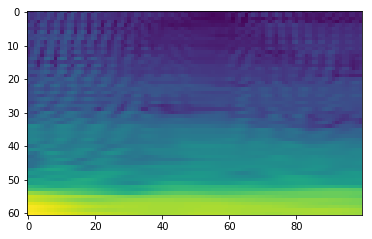

In [70]:
img.view(100,61).numpy()
plt.imshow(np.flipud(img.view(100,61).numpy().transpose()))

In [103]:
top_p, top_class = ps.topk(2, dim=1)
print(top_p)
print(top_class)
print

tensor([[0.5682, 0.4318]])
tensor([[1, 0]])


In [112]:
next(model.parameters()).is_cuda

False

In [126]:
images, labels = next(iter(trainloader))
with torch.no_grad():
    logps = model(images)
    
ps = torch.exp(logps)
print(ps)
print(labels)

tensor([[0.4565, 0.5435],
        [0.4446, 0.5554],
        [0.4643, 0.5357],
        [0.4559, 0.5441],
        [0.4648, 0.5352],
        [0.4752, 0.5248],
        [0.4576, 0.5424],
        [0.4795, 0.5205],
        [0.4576, 0.5424],
        [0.4570, 0.5430]])
tensor([1, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=torch.int32)


In [124]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]])


In [134]:
equals = top_class == labels.view(*top_class.shape)
print(equals)

tensor([[ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False]])


In [135]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 50.0%
